Predicting if a person will survive the titanic or not based on certain parameters using Decision Tree

In [6]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
df=pd.read_csv('titanic.csv')

In [16]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


####Exploratory Data Analysis

In [4]:
pd.crosstab(df.Survived,df.Pclass)

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


It is evident that people in higher class had a greater chance of surviving

In [5]:
pd.crosstab(df.Survived,df.Sex)

Sex,female,male
Survived,,
0,81,468
1,233,109


It is observed that females have higher chance of surviving than males

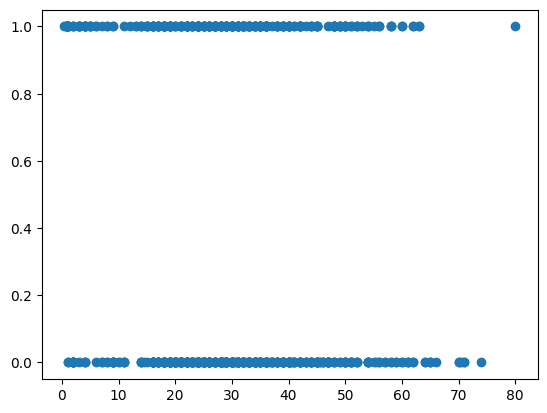

In [7]:
plt.scatter(df.Age,df.Survived)

It could be that Age is a factor in determing the survival chance

In [8]:
pd.crosstab(df.Survived,df.SibSp)

SibSp,0,1,2,3,4,5,8
Survived,,,,,,,
0,398,97,15,12,15,5,7
1,210,112,13,4,3,0,0


In [9]:
pd.crosstab(df.Survived,df.Parch)

Parch,0,1,2,3,4,5,6
Survived,,,,,,,
0,445,53,40,2,4,4,1
1,233,65,40,3,0,1,0


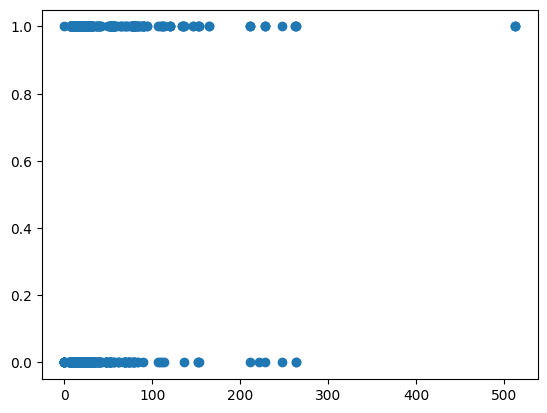

In [10]:
plt.scatter(df.Fare,df.Survived)

Hence from the above we can conclude that the survival rate will depend on the Pclass, Fare, Age and Sex of the person and not on any other factor

####Cleaning the dataset

In [17]:
df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis='columns',inplace=True)

In [18]:
df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [19]:
df.Age[:10]

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64

Since we see null values we will replace them with average age

In [20]:
df.Age = df.Age.fillna(df.Age.mean())

In [21]:
df.Age[:10]

0    22.000000
1    38.000000
2    26.000000
3    35.000000
4    35.000000
5    29.699118
6    54.000000
7     2.000000
8    27.000000
9    14.000000
Name: Age, dtype: float64

In [23]:
le=LabelEncoder()
df['new_sex']=le.fit_transform(df.Sex)

In [24]:
df.new_sex

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: new_sex, Length: 891, dtype: int64

In [25]:
df.drop('Sex',axis='columns',inplace=True)

In [26]:
df.head()

,Survived,Pclass,Age,Fare,new_sex
0,0,3,22.0,7.2500,1
1,1,1,38.0,71.2833,0
2,1,3,26.0,7.9250,0
3,1,1,35.0,53.1000,0
4,0,3,35.0,8.0500,1


####Creating and training the data

In [27]:
input = df.drop('Survived',axis='columns')
input.head()

,Pclass,Age,Fare,new_sex
0,3,22.0,7.2500,1
1,1,38.0,71.2833,0
2,3,26.0,7.9250,0
3,1,35.0,53.1000,0
4,3,35.0,8.0500,1


In [28]:
target = df.Survived
target.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [37]:
model = DecisionTreeClassifier()

In [35]:
x_train, x_test, y_train, y_test = train_test_split(input,target,test_size=0.2)

In [38]:
model.fit(x_train, y_train)

DecisionTreeClassifier()

####Checking the accuracy of model

In [39]:
model.score(x_test,y_test)

0.7262569832402235

Thus we have successfully made a model that will predict if a person will survive the titanic or not based on Age, Sex, Pclass and Fare with an accuracy of 72%